# Пример 1
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score



In [ ]:
data = pd.read_csv('telecom_users.csv')
data.info() # смотрим общую информацию по датафрейму. 18 признаков имеют тип object и 4 признака — числовые (1 float, 3 int).
                #пропусков нет в каждом столбце по 5986 наблюдений.
#в обучении используем числовые признакиб поэтому все признаки типа object переведём в числовые.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'], errors='coerce')#столбец оплаты представлен как текст,
    #хотя содержит численные значение, поэтому мы его преобразуем в число, удаляем появившиеся Nan и округляем для удобства использования

In [ ]:
data = data.dropna()

Столбец "TotalCharges" содержит общая сумма, которую клиент заплатил за услуги за все время, но в строковом типе, поэтому мы её преобразуем в инт

In [ ]:
data["TotalCharges"] = data["TotalCharges"].astype(int)

In [ ]:
data.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869,Yes


In [ ]:
data.describe() # познакомимся  с данными

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,3534.770750,0.161647,32.523092,64.846687,2297.587349
std,2035.409858,0.368157,24.500858,30.107576,2274.124600
min,0.000000,0.000000,1.000000,18.250000,18.000000
25%,1779.750000,0.000000,9.000000,35.750000,404.000000
50%,3548.000000,0.000000,29.000000,70.425000,1411.500000
75%,5293.500000,0.000000,56.000000,89.900000,3846.250000
max,7042.000000,1.000000,72.000000,118.750000,8684.000000


Из всех предложенных данных, практический каждый кроме customerID может влиять на склонность клиента к оттоку.

Первое что необходимо сделать:
 1 удалить из данных столбец customerID, сохранив его в отдельный датафрейм
 2. преобразовать все данные в численный вид

In [ ]:
customerID = data['customerID']
data = data.drop(["customerID","Unnamed: 0"], axis = 1) #сохраним столбец с id в отдельный файл,
# и затем удалим его и индексный столбец как неинформативные

визуализируем данные и посмотрим основные закономерности.

In [ ]:
pd.crosstab(data['Churn'], data['Contract'], margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,1871,1127,1391,4389
Yes,1398,148,41,1587
All,3269,1275,1432,5976


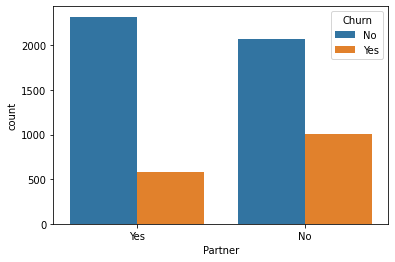

In [ ]:
sns.countplot(x='Partner', hue='Churn', data=data) #наличие или остутствие партнёра не влияет на лояльность клиента,
#похожая картина наблюдается и при расссмотрении таких признаков, как является ли клиент пенсионером и колличество иждивенцев.

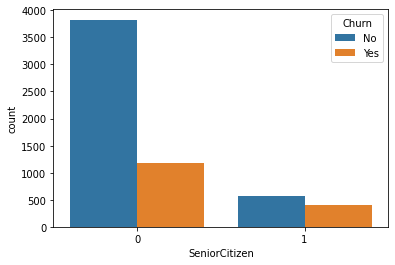

In [ ]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data) # большинство клиентов не пенсионеры, и не склонны к уходу из компании

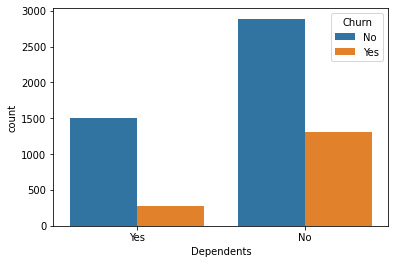

In [ ]:
sns.countplot(x='Dependents', hue='Churn', data=data)# Наличие иждевенцев показывает более явное влияние. У большинства клиентов
# их нет, и они не склонны к уходу из компании.

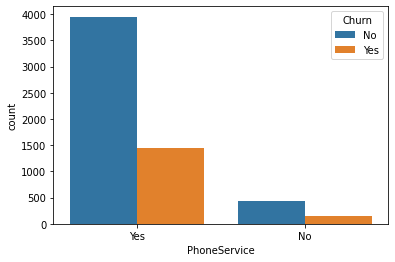

In [ ]:
sns.countplot(x='PhoneService', hue='Churn', data=data)

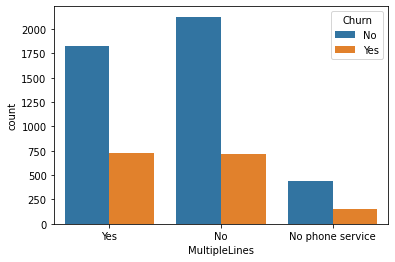

In [ ]:
sns.countplot(x='MultipleLines', hue='Churn', data=data)

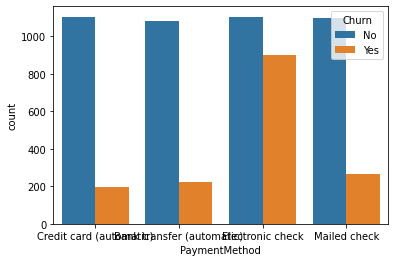

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)# увеличивается кол-во клиентов склонных к оттоку при получении электронного чека

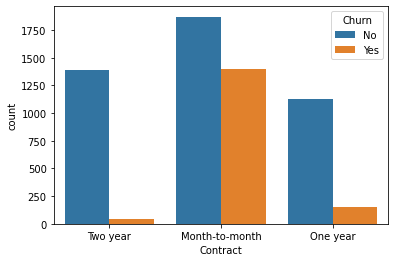

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=data)#клиенты больше предларсположены к уходу при ежемесячном продлении контракта

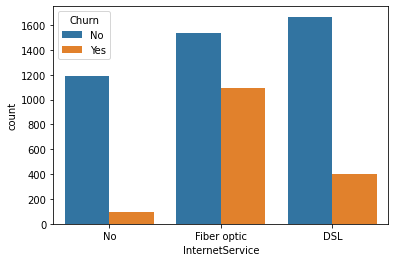

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=data)

# 2. Исследование зависимостей и формулирование гипотез

Гипотезы, которые можно предположить.
1. Чем больше услуг подключено клиенту, тем меньше вероятность его отключения
2. Большая ежемесячная оплата может привести к желанию клиента отключиться
3. Автоматизация оплаты делает жизнь клиента проще и он будет благополучно оставаться
4. Чем дольше клиент остаётся в компании тем меньше вероятность того, что он уйдёт




In [ ]:
#Посмотрим на распределение данных по нашей целевой переменной — Churn:
data['Churn'].value_counts() # 4389 пользователей из 5976 — лояльные, значение переменной Churn у них — 0.

No     4389
Yes    1587
Name: Churn, dtype: int64

Данные не сбалансированы, это необходимо учесть при обучении моделей

In [ ]:
from sklearn.preprocessing import LabelEncoder # преобразуем все текстовые данные в численные
labelencoder =  LabelEncoder()

data['gender'] = labelencoder.fit_transform(data['gender'])
data['Partner'] = labelencoder.fit_transform(data['Partner'])
data['Dependents'] = labelencoder.fit_transform(data['Dependents'])
data['PhoneService'] = labelencoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = labelencoder.fit_transform(data['MultipleLines'])
data['InternetService'] = labelencoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = labelencoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = labelencoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = labelencoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = labelencoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = labelencoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = labelencoder.fit_transform(data['StreamingMovies'])
data['Contract'] = labelencoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = labelencoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = labelencoder.fit_transform(data['PaymentMethod'])
data['PaymentMethod'] = labelencoder.fit_transform(data['PaymentMethod'])
data['Churn'] = labelencoder.fit_transform(data['Churn'])

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119,0


In [ ]:
data.groupby("Churn").sum()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
0,2248,564,2320,1500,165401,3950,4083,3908,4112,4460,4376,4118,4414,4470,3909,2344,6609,269824.15,11270174
1,796,402,576,281,28957,1438,1595,1289,591,999,1013,631,1477,1491,230,1181,2791,117699.65,2460208


в данной таблице мы можем увидеть распределение ресурсов и привычек как у лояльных так и не лояльных киентов. Нас интересуют в первую очередь те признаки которые распределяются не равномерно.
Но для большей наглядности проверим каковы средние значения числовых признаков среди лояльных пользователей?

In [ ]:
data_CH = data.groupby('Churn').apply(lambda x: x.mean())
data.sort_values
data.reset_index(inplace=True)
data_CH

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Churn,,,,,,,,,,,,,,,,,,,,
0,0.512190,0.128503,0.528594,0.341763,37.685350,0.899977,0.930280,0.890408,0.936888,1.016177,0.997038,0.938255,1.005696,1.018455,0.890636,0.534062,1.505810,61.477364,2567.822739,0.0
1,0.501575,0.253308,0.362949,0.177064,18.246377,0.906112,1.005041,0.812224,0.372401,0.629490,0.638311,0.397606,0.930687,0.939509,0.144928,0.744171,1.758664,74.164871,1550.225583,1.0


In [ ]:
data[data['Churn'] == 0].mean()

index               3006.512873
gender                 0.512190
SeniorCitizen          0.128503
Partner                0.528594
Dependents             0.341763
tenure                37.685350
PhoneService           0.899977
MultipleLines          0.930280
InternetService        0.890408
OnlineSecurity         0.936888
OnlineBackup           1.016177
DeviceProtection       0.997038
TechSupport            0.938255
StreamingTV            1.005696
StreamingMovies        1.018455
Contract               0.890636
PaperlessBilling       0.534062
PaymentMethod          1.505810
MonthlyCharges        61.477364
TotalCharges        2567.822739
Churn                  0.000000
dtype: float64

In [ ]:
data[data['Churn'] == 1].mean()# и не лояльных клиентов

index               2949.394455
gender                 0.501575
SeniorCitizen          0.253308
Partner                0.362949
Dependents             0.177064
tenure                18.246377
PhoneService           0.906112
MultipleLines          1.005041
InternetService        0.812224
OnlineSecurity         0.372401
OnlineBackup           0.629490
DeviceProtection       0.638311
TechSupport            0.397606
StreamingTV            0.930687
StreamingMovies        0.939509
Contract               0.144928
PaperlessBilling       0.744171
PaymentMethod          1.758664
MonthlyCharges        74.164871
TotalCharges        1550.225583
Churn                  1.000000
dtype: float64

In [ ]:
columns_to_show = ['tenure', 'MonthlyCharges', 'TotalCharges']# посмотрим взаимосвязь лояльности с такими признаками
                                                        #как срок пребывания клиентом, месячный размер оплаты и тип контракта

data.groupby(['Churn'])[columns_to_show].describe(percentiles=[])


tenure                             ... TotalCharges                      
        count       mean        std  min  ...          std   min     50%     max
Churn                                     ...                                   
0      4389.0  37.685350  24.025427  1.0  ...  2335.456746  18.0  1689.0  8672.0
1      1587.0  18.246377  19.667262  1.0  ...  1905.707033  18.0   706.0  8684.0

[2 rows x 18 columns]

In [ ]:
pd.crosstab(data['Churn'], data['tenure'], margins=True)# т.е. очевидно, что чем дольше клиент пользуется услугами
                                                        # компании тем меньше вероятность что он уйдёт

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,192,90,87,81,59,62,70,73,60,63,58,64,57,43,55,46,54,65,48,47,40,53,53,61,50,54,55,38,48,47,41,48,44,45,61,34,44,39,33,41,47,44,47,42,42,49,51,45,42,49,55,56,44,43,47,58,52,51,44,60,54,61,60,68,56,63,73,81,71,80,147,304,4389
1,318,104,82,73,52,36,41,37,37,39,27,33,29,20,28,24,19,18,16,16,14,23,12,18,19,12,12,11,14,13,15,17,12,10,13,9,12,10,11,13,12,13,15,5,5,12,11,9,13,9,8,6,13,12,8,10,7,10,8,5,6,5,2,3,9,11,8,8,6,10,5,4,1587
All,510,194,169,154,111,98,111,110,97,102,85,97,86,63,83,70,73,83,64,63,54,76,65,79,69,66,67,49,62,60,56,65,56,55,74,43,56,49,44,54,59,57,62,47,47,61,62,54,55,58,63,62,57,55,55,68,59,61,52,65,60,66,62,71,65,74,81,89,77,90,152,308,5976


In [ ]:
pd.crosstab(data['Churn'], data['TotalCharges'], margins=True)

TotalCharges,18,19,20,21,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,...,8166,8175,8182,8196,8220,8240,8244,8248,8277,8289,8306,8308,8309,8310,8312,8317,8331,8332,8333,8337,8349,8375,8399,8404,8405,8424,8425,8436,8456,8476,8477,8496,8529,8543,8547,8564,8594,8672,8684,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,40,35,1,0,8,9,1,0,2,1,2,1,3,2,1,1,1,5,4,2,1,2,4,16,7,3,2,4,12,9,2,3,3,4,8,1,3,1,2,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,0,4389
1,1,21,24,1,1,6,9,0,1,2,2,1,0,1,0,7,2,0,1,1,1,1,1,2,9,22,2,1,1,5,14,2,1,3,2,5,2,0,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1587
All,4,61,59,2,1,14,18,1,1,4,3,3,1,4,2,8,3,1,6,5,3,2,3,6,25,29,5,3,5,17,23,4,4,6,6,13,3,3,4,5,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,5976


In [ ]:
pd.crosstab(data['Churn'], data['MonthlyCharges'])# посути столбец "TotalCharges"
#- это произведение 'MonthlyCharges' и 'tenure'

MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,19.05,19.10,19.15,19.20,19.25,19.30,19.35,19.40,19.45,19.50,19.55,19.60,19.65,19.70,19.75,19.80,19.85,19.90,19.95,20.00,20.05,20.10,20.15,20.20,20.25,20.30,20.35,20.40,20.45,20.50,...,114.90,114.95,115.00,115.05,115.10,115.15,115.25,115.50,115.55,115.60,115.65,115.75,115.80,115.85,116.00,116.05,116.10,116.15,116.20,116.25,116.30,116.40,116.45,116.50,116.55,116.60,116.75,116.80,116.85,116.95,117.15,117.35,117.45,117.60,117.80,118.20,118.35,118.60,118.65,118.75
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,6,3,2,4,6,9,11,10,16,12,18,22,21,19,25,35,29,31,36,27,33,34,29,33,28,48,30,26,24,29,23,29,22,23,22,...,2,1,1,4,3,3,1,2,3,2,1,1,4,1,1,2,1,1,0,2,1,1,1,1,1,2,1,1,1,1,1,1,0,1,0,1,0,2,1,1
1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,3,3,2,2,2,2,2,4,4,2,6,1,5,3,3,2,2,3,4,6,4,1,3,1,0,3,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [ ]:
data['number_of_services'] = data['OnlineSecurity'] + data['OnlineBackup'] + data['DeviceProtection'] \
                                + data['TechSupport'] + data ['StreamingTV'] + data ['StreamingMovies']
    # Сервисы подключаются или вместе или не подключаются вовсе, поэтому вполне логично будет объёдинить их наличие в один признак

In [ ]:
pd.crosstab(data['Churn'], data['OnlineSecurity'], margins=True)

OnlineSecurity,0,1,2,All
Churn,,,,
0,1740,1186,1463,4389
1,1242,99,246,1587
All,2982,1285,1709,5976


In [ ]:
pd.crosstab(data['Churn'], data['number_of_services'], margins=True)

number_of_services,0,2,4,6,8,10,12,All
Churn,,,,,,,,
0,280,454,560,1869,570,422,234,4389
1,318,373,293,360,167,62,14,1587
All,598,827,853,2229,737,484,248,5976


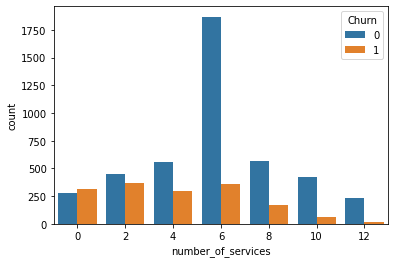

In [ ]:
sns.countplot(x='number_of_services', hue='Churn', data=data) # видно взаимосвязь
#кол-ва подключенных сервисов и лояльности клиентов, причем максимальное кол-во лояльных клиентов при 6 подключенных сервисах

Таким образом мы видим, что наибольшее число сервисов при котором наблюдаются вполне

In [ ]:
data['Family'] = data['Partner'] + data['Dependents']

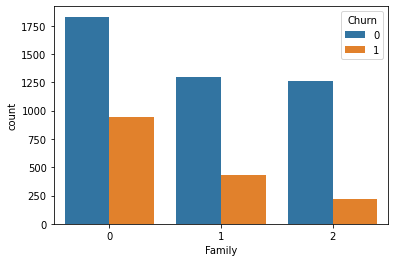

In [ ]:
sns.countplot(x='Family', hue='Churn', data=data)

In [ ]:
pd.crosstab(data['Churn'], data['Family'], margins=True)

Family,0,1,2,All
Churn,,,,
0,1830,1298,1261,4389
1,945,427,215,1587
All,2775,1725,1476,5976


In [ ]:
data['tenure_count'] = (data['tenure']/12).astype('int')
# переведём продожительность пребывания клиентом из кол-ва месяцев в года

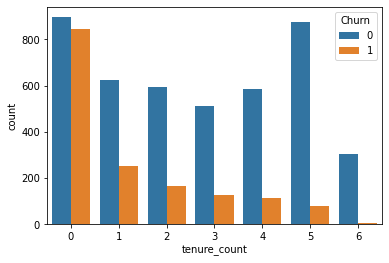

In [ ]:
sns.countplot(x='tenure_count', hue='Churn', data=data)# самый большой отток в первые месяца

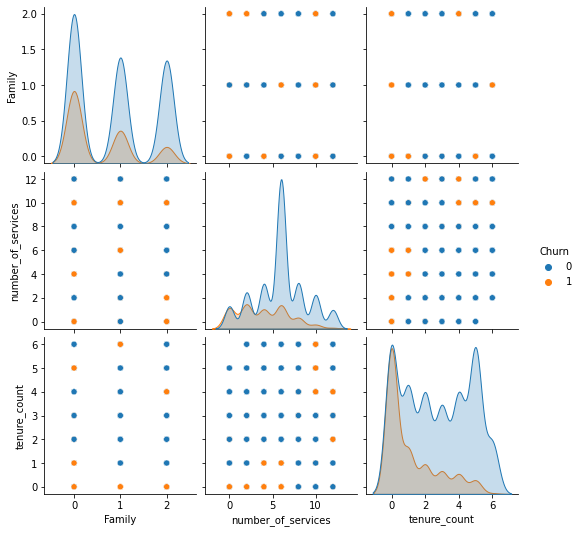

In [ ]:
import seaborn as sns
sns.pairplot(data[["Family", 'number_of_services', "tenure_count", "Churn"]], hue = 'Churn')

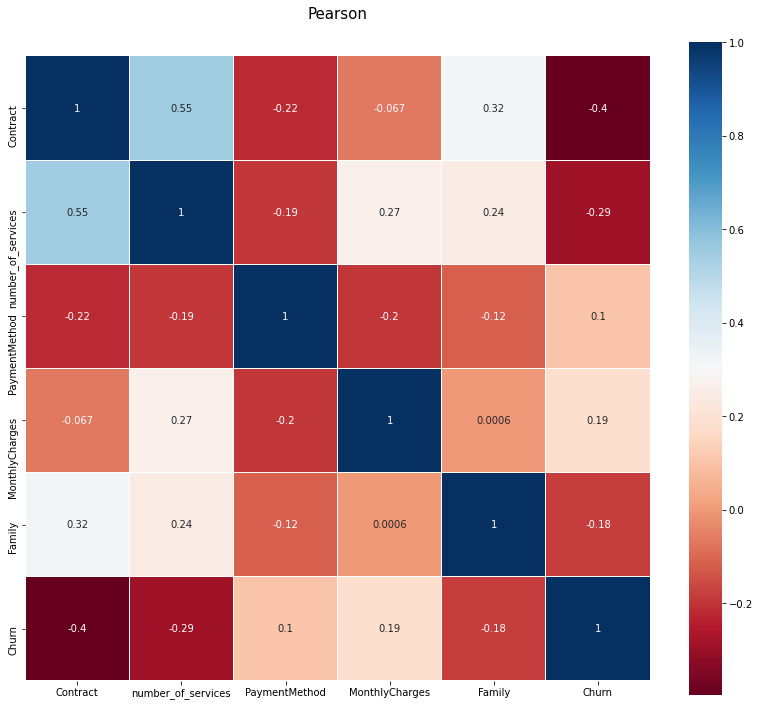

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson', y=1.05, size=15)
sns.heatmap(data[["Contract", "number_of_services", "PaymentMethod", "MonthlyCharges","Family", "Churn"]].corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
columns_to_show = ["PaperlessBilling", "PaymentMethod", "number_of_services"]# посмотрим взаимосвязь лояльности с такими признаками
                                                        #как срок пребывания клиентом, месячный размер оплаты и тип контракта

data.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

PaperlessBilling                           ... number_of_services                
                 count      mean       std  min  ...                std  min  50%   max
Churn                                            ...                                   
0               4389.0  0.534062  0.498895  0.0  ...           2.904057  0.0  6.0  12.0
1               1587.0  0.744171  0.436463  0.0  ...           2.950471  0.0  4.0  12.0

[2 rows x 18 columns]

# 3. Построение моделей для прогнозирования оттока

Проведём блиц тест по моделям классификации, чтобы увидеть какие из них показывают лучшие результаты.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                    StratifiedShuffleSplit,
                                    cross_val_score)

from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

Так как в данном датасете сложно выявить явно влиятельные признаки, для дальнейших исследований создадим несколько датасетов с разным набором признаков.

In [ ]:
data_train = data.drop(["Churn", "index", 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', \
                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', "tenure"], axis=1)
#первоначальный датасет, из которого мы убираем только явно не нужные и созданные нами столбцы

In [ ]:
targets_train = data.Churn

In [ ]:
#Первоначально исследуем наиболее распространённые модели классификации
# определим в качестве проходной roc_auc_score не ниже 78

In [ ]:
def model_find(input_x, input_y):
    skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
    x_train, x_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.2,  random_state=17)

    ros = RandomOverSampler(random_state=17)
    x_res, y_res = ros.fit_resample(x_train, y_train)

    models = []
    models.append(('LR', LogisticRegression(max_iter=4000)))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
    models.append(('TREE', DecisionTreeClassifier(max_depth = 6)))
    models.append(("GNB", GaussianNB()))
    models.append(('SVC', SVC(probability=True)))
    models.append(('MLP', MLPClassifier()))
    models.append(('RF', RandomForestClassifier( )))
    models.append(('GBC', GradientBoostingClassifier()))

    for name, model in models:
        cross_val_score(model, x_res, y_res, cv=skf, scoring='accuracy')
        model.fit(x_res, y_res)
        m_predict = model.predict(x_test)
        m_score = recall_score(y_test, m_predict)
        print( f'Модель  {name}  - \n',
               f'Stacking AUC: {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}\n')

In [ ]:
model_find(data_train, targets_train)

Модель  LR  - 
 Stacking AUC: 0.8279099325505149

Модель  KNN  - 
 Stacking AUC: 0.7992637607059808

Модель  TREE  - 
 Stacking AUC: 0.8057126247526613

Модель  GNB  - 
 Stacking AUC: 0.8075306555743316

Модель  SVC  - 
 Stacking AUC: 0.8187602004708466

Модель  MLP  - 
 Stacking AUC: 0.8267978104192846

Модель  RF  - 
 Stacking AUC: 0.7781532995363751

Модель  GBC  - 
 Stacking AUC: 0.8289967791787629



In [ ]:
# лучше всего себя показала модель градиентного бустинга, затем идёт линейная регрессия, на 3м месте модели MLP, SVC, TREE, GNB

Определим оптимальные параметры для моделей, показавших большую точность, хотя в принципе получается, что явно исключить надо только RandomForestClassifier( ), так как остальные для первого приближения показывают неплохие результаты.

In [ ]:
lr_params = {'C': np.arange(0.5, 1, 0.1),
            'random_state': range(0, 50)}
knn_params = {'n_neighbors': range(10,31) ,
              "weights": ["uniform", "distance"]}
gnb_params = {'var_smoothing':[0.01, 1, 0.02]}
tree_params = { 'max_depth': range (0, 18, 2),
             # 'min_samples_leaf': range (6,12),
             'min_samples_split': range (6,12,1),
              'random_state': range(0, 50, 5)}
gbc_params = {#'learning_rate': np.arange(0.1, 0.6, 0.1),
              'max_depth':range(0,8,2),
              'min_samples_leaf': range(0, 5,2),
              'random_state': range(0, 50, 5)}
svc_params = {'kernel': ['linear', 'rbf'],
              'C': np.arange(0.5, 1, 0.1),
             'random_state': range(0, 50, 5)}
mlp_params = {"max_iter": [500, 1000, 2000],
              "learning_rate_init" : [0.001, 0.01],
             'random_state': range(0, 50, 5)}


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
gnb = GaussianNB()
tree = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
mlp = MLPClassifier()

In [ ]:
models_find = []
models_find.append(('LR', lr, lr_params))
models_find.append(('KNN', knn, knn_params))
models_find.append(("GNB", gnb, gnb_params))
models_find.append(('TREE', tree, tree_params))
models_find.append(('GBC', gbc, gbc_params))
models_find.append(('SVC', svc,  svc_params))
models_find.append(('MLP', mlp, mlp_params))


In [ ]:
def model_find_params(input_x, input_y, models):
    skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
    x_train, x_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.2,  random_state=17)

    ros = RandomOverSampler(random_state=17)
    x_res, y_res = ros.fit_resample(x_train, y_train)

    for name, model, params in models:
        model_grid = GridSearchCV(model, params, cv = skf)
        x_res, y_res = ros.fit_resample(x_train, y_train)
        cross_val_score(model_grid, x_res, y_res, cv=skf, scoring='accuracy')
        model_train = model_grid.fit(x_res, y_res)
        preds = model_train.predict_proba(x_test)
        print( name, model_train.best_params_,  f'Stacking AUC: {roc_auc_score(y_test, preds[:, 1])}\n')



In [ ]:
model_find_params(data_train, targets_train, models_find)

KeyboardInterrupt: ignored

Для дальнейших рассчётов возьмём модели, которые хотя бы в одном из 2х предыдущих тестов показывали roc_auc больше 80. Причём наличие или отсутствие параметров, будет определяться результатом теста, так как некоторые модели без параметров, показали лучшие результаты, чем при их наличии.

In [ ]:
LR = LogisticRegression(C = 0.7, max_iter=5000, random_state=42)
GNB = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=16)
TREE = DecisionTreeClassifier(max_depth = 6, random_state = 42)
MLP = MLPClassifier(learning_rate_init = 0.001, max_iter = 100, random_state = 42)
SVC = SVC(C = 0.89, kernel = 'rbf', random_state = 42, probability=True)
GBC = GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 2, random_state = 42)

In [ ]:
models_learn = [('LR', LR),
            ('GNB', GNB),
            ("KNN", KNN),
            ("TREE", TREE),
            ('MLP', MLP),
            ('SVC', SVC),
            ('GBC', GBC)]


In [ ]:
i500 = np.logspace(-1, 2, num = 500)
def eval_model(input_x, input_y, models):
    skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

    ros = RandomOverSampler(random_state=17)

    for name, model in models:
        for train_index, test_index in skf.split(input_x, input_y):
            x_train, x_test = input_x.iloc[train_index], input_x.iloc[test_index]
            y_train, y_test = input_y.iloc[train_index], input_y.iloc[test_index]
            x_res, y_res = ros.fit_resample(x_train, y_train)
            cross_val_score(model, x_res, y_res, cv=skf, scoring='accuracy')
            model_train = model.fit(x_res, y_res)
            preds = model_train.predict_proba(x_test)
        print( name,  f'Stacking AUC: {roc_auc_score(y_test, preds[:, 1])}\n')


In [ ]:
eval_model(data_train, targets_train, models_learn)

LR Stacking AUC: 0.8245465889288097

GNB Stacking AUC: 0.8128321249542824

KNN Stacking AUC: 0.782083001656591

TREE Stacking AUC: 0.8085185344549386

MLP Stacking AUC: 0.8304665705700537

SVC Stacking AUC: 0.8050690963332687

GBC Stacking AUC: 0.8108384788049597



In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(data_train,
                                targets_train, test_size=.2,  random_state=17)

In [ ]:
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

In [ ]:
meta = LR

In [ ]:
models = [GNB, TREE, KNN, MLP, SVC, GBC]


In [ ]:
def stacking(models, meta,  data, targets, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:

        meta_mtrx = np.empty((data.shape[0], len(models)))

        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data, targets, cv=cv, method='predict')# матрица мета признаков
            model_base = model.fit(data, targets) #


        meta_model = meta.fit(meta_mtrx, targets)      # обучаем мета-модель на собранной матрице

        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) #формируем матрицу для теста

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test) # заполняем

            preds = meta.predict_proba(meta_mtrx_test)


        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, preds[:, 1])}')
            report = classification_report(targets_test, meta.predict(meta_mtrx_test), target_names=['Non-churned', 'Churned'])
            print(report)
    elif test_size > 0 and test_size < 1:

        train, valid, train_true, valid_true = train_test_split(data,
                                                        targets,
                                                        test_size=test_size,
                                                        random_state=0)

        meta_mtrx = np.empty((valid.shape[0], len(models)))
        for n, model in enumerate(models):
            model_p = model.fit(train, train_true)
            meta_mtrx[:, n] = model_p.predict(valid)


        meta_model = meta.fit(meta_mtrx, valid_true)
        meta_mtrx_test = np.empty((data_test.shape[0], len(models)))

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model_p.predict(data_test)

            preds = meta.predict_proba(meta_mtrx_test)
        if targets_test is not None:
            print(f'Stacking AUC: {roc_auc_score(targets_test, preds[:, 1])}')
            report = classification_report(targets_test, meta.predict(meta_mtrx_test), target_names=['Non-churned', 'Churned'])
            print(report)
    else:
        raise ValueError("test_size must be between 0 and 1")
        return meta

In [ ]:
stacking(models, meta,  data_train, targets_train, x_test, y_test, random_state=None, test_size=None, cv=5)

Stacking AUC: 0.8119431879409075
              precision    recall  f1-score   support

 Non-churned       0.85      0.91      0.88      1754
     Churned       0.68      0.54      0.61       637

    accuracy                           0.81      2391
   macro avg       0.76      0.73      0.74      2391
weighted avg       0.80      0.81      0.80      2391



In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('GBC', GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 2, random_state = 42)),
              #('LR', LogisticRegression(C = 0.7, max_iter=5000, random_state=42)),
              ('GNB', GaussianNB()),
              ('KNN', KNeighborsClassifier(n_neighbors=16)),
              ("TREE", DecisionTreeClassifier(max_depth = 6, random_state = 42)),
              ("MLP", MLPClassifier(learning_rate_init = 0.001, max_iter = 100, random_state = 42)),
              ('SVC', SVC(C = 0.89, kernel = 'rbf', random_state = 42, probability=True))]
final_estimator = LogisticRegression(C = 0.7, max_iter=5000, random_state=42)
reg = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
reg.fit(x_train, y_train)
preds = reg.predict_proba(x_test)
print(f'Stacking AUC: {roc_auc_score(y_test, preds[:, 1])}')
report = classification_report(y_test, reg.predict(x_test), target_names=['Non-churned', 'Churned'])
print(report)

Stacking AUC: 0.8288956771668328
              precision    recall  f1-score   support

 Non-churned       0.84      0.89      0.86       882
     Churned       0.63      0.54      0.58       314

    accuracy                           0.80      1196
   macro avg       0.74      0.71      0.72      1196
weighted avg       0.79      0.80      0.79      1196



# 4. Сравнение качества моделей

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
      data_train, targets_train, test_size= 0.4, random_state=17)
for name, model in models_learn:
  report = classification_report(y_test, model.predict(x_test), target_names=['Non-churned', 'Churned'])
  print(name, report)

#Наибольшую точность (precision) показали модели GBC, MLP, KNN, TREE. f1-score из этих моделей наилучшее у GBC и KNN.

LR               precision    recall  f1-score   support

 Non-churned       0.90      0.69      0.78      1754
     Churned       0.48      0.79      0.60       637

    accuracy                           0.72      2391
   macro avg       0.69      0.74      0.69      2391
weighted avg       0.79      0.72      0.73      2391

GNB               precision    recall  f1-score   support

 Non-churned       0.91      0.66      0.76      1754
     Churned       0.46      0.81      0.59       637

    accuracy                           0.70      2391
   macro avg       0.69      0.74      0.68      2391
weighted avg       0.79      0.70      0.72      2391

KNN               precision    recall  f1-score   support

 Non-churned       0.91      0.72      0.80      1754
     Churned       0.51      0.80      0.62       637

    accuracy                           0.74      2391
   macro avg       0.71      0.76      0.71      2391
weighted avg       0.80      0.74      0.76      2391

TREE    

Как мы видим, использование stacking хоть и не намного, но увеличило точность модели. Причём результат библиотечного стекинга не намного превысил собственую реализацию. Конечно же можно ещё попробовать "поиграть" с мета моделью и ансамблем. Так например, когда у нас метамоделью выступает GBC мы видим более высокую точность и полноту, чем при LR, но LR  в свою очередь показываем более высокое значение roc_auc.
